# Part II - Features that Affect Borrower's Annual Percentage Rate
## by Fidelis Katandika

## Investigation Overview

This exploration focused on the borrowers in the dataset that had loans with prosper in the dataset, which came to around 19000+ records. The exploration focused on identifying what features affected Borrower's Annual Percentage Rate.  The results of the exploration have shown a strong correlation with between Borrower Annual Percentage Rate, Prosper Rating and Credit Score. Additionally, the loan term revealed loans with a length of 12 months are cheaper, followed by 60 month-long loans. 12 month loans overode the credit score rating. 36 month loans were on average more costly than the other 2 categories. The Credit Score/Prosper Rating influence the BAPR for loans with length large than 12 months, however, the loans with the longest term have better Borrower Average with significant influence from the credit score.

## Dataset Overview

The data consists 113,937 loans from prosper with 81 variables on each loan. The subset of the dataset which has 19771 observations and 11 attributes was used for the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [11]:
# load in the dataset into a pandas dataframe
previous_borrowers = pd.read_csv("previous_borrowers.csv")
# Order Prosper Rating & Change type
rating_classes = ['HR','E','D','C','B','A','AA']
ProsperRating = pd.api.types.CategoricalDtype(ordered = True, categories = rating_classes)
previous_borrowers['ProsperRating'] = previous_borrowers['ProsperRating'].astype(ProsperRating)




## Borrower's Annual Percentage Rate

The Borrower's APR is the annual interest rate charged on a loan. The graph depicts peak Borrower's APR lies between 12% to around 30%. The distribution is unimodal. There is a small number of borrowers with APR that is greater than 40%.

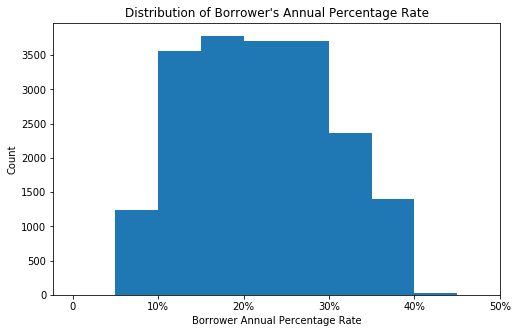

In [7]:
# Plotting the main variable of interest BorrowerAPR
binsize = 5
bins = np.arange(0, previous_borrowers['BorrowerAPR'].max()+binsize, binsize)
#print(bins)
plt.figure(figsize=[8, 6])
plt.hist(data = previous_borrowers, x = 'BorrowerAPR', bins=bins)
plt.xlabel("Borrower Annual Percentage Rate")
plt.title("Distribution of Borrower's Annual Percentage Rate")
plt.xticks([0,10,20,30,40,50],["0","10%","20%","30%","40%","50%"])
plt.ylabel('Count')
plt.show()

### Credit Score Average
The credit score appears is unimodal in distribution. The vast majority of borrowers lie in a particular range 680 to 730, with the extreme ends having fewer numbers.

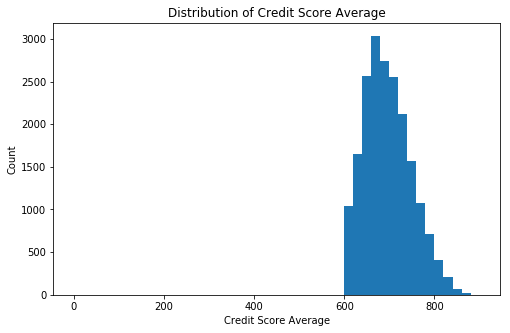

In [8]:
# Plot of Credit Score Average
binsize = 20
bins = np.arange(0, previous_borrowers['CreditScoreAvg'].max()+binsize, binsize)
plt.figure(figsize=[8, 6])
plt.hist(data = previous_borrowers, x = 'CreditScoreAvg', bins=bins)
plt.xlabel('Credit Score Average')
plt.title("Distribution of Credit Score Average")
plt.ylabel('Count')
plt.show()

## Prosper Rating by Average Credit Score
A Box Plot show Credit Score Avg and Prosper Rating largely behaving the same way. These variable affect BAPR in a very similar mannner.

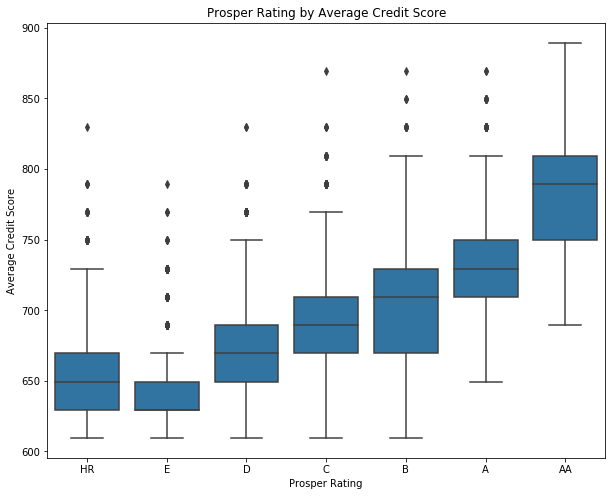

In [12]:
##Box Plot for ProsperRating and Credit Score Average

plt.figure(figsize=[10, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = previous_borrowers, x = 'ProsperRating', y = 'CreditScoreAvg',color=base_color);
plt.xlabel('Prosper Rating')
plt.title("Prosper Rating by Average Credit Score")
plt.ylabel("Average Credit Score");

## Loan Term by Borrower's APR

Loans with a duration of 36 months have the highest average BAPR, followed by the 60 month-long loan. The 12 month loan has the lower average BAPR

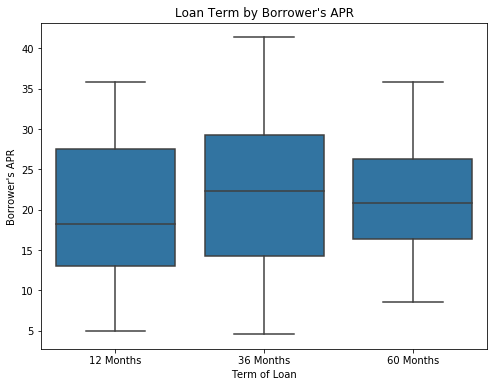

In [29]:
#Box plot for Loan Term/Tenure and BorrowerAPR
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,6])
sb.boxplot(data = previous_borrowers, x = 'Term', y = 'BorrowerAPR',color=base_color);
plt.xlabel('Term of Loan')
plt.title("Loan Term by Borrower's APR")
plt.ylabel("Borrower's APR");
plt.xticks([0,1,2],["12 Months","36 Months","60 Months"]);

## CreditScoreAvg by BorrowerAPR
A scatter plot of CreditScoreAvg and BorrowerAPR, shows there is negative correlation between the attributes. The better score the more likely the BAPR will be lower.


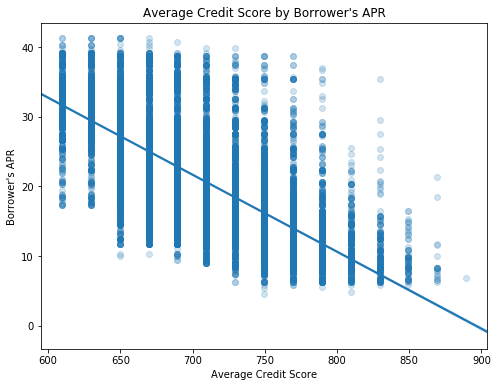

In [21]:
# Scatter plot for CreditScoreAvg and BorrowerAPR
plt.figure(figsize=[8,6])
sb.regplot(data = previous_borrowers, x = 'CreditScoreAvg', y = 'BorrowerAPR',truncate=False, scatter_kws={'alpha':1/5});
plt.xlabel('Average Credit Score')
plt.title("Average Credit Score by Borrower's APR")
plt.ylabel("Borrower's APR");

## Average Credit Score  by Borrower's APR

The graph provides valueable data, its shows 12 Months-long loan largely have low BAPR and are not affected by the score as much as the other loan terms. On average 36 months loan are more costly, but has cheaper and more costly extermes over the Credit Score range. The Score affect 60 months loan, the better the score the lower the cost of borrowing but on average is it the better choice. 

The Credit Score/Prosper Rating influence the BAPR for loans with length large than 12 months, however, the loans with the longest term have better Borrower Average with significant influence from the credit score.

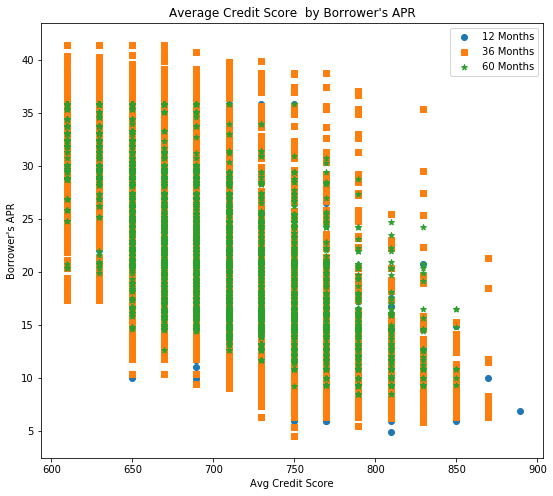

In [31]:
cat_markers = [[12, 'o'],
               [36, 's'],
               [60, '*']]
plt.figure(figsize=[9, 8])
for cat, marker in cat_markers:
    previous_borrowers_cat = previous_borrowers[previous_borrowers['Term'] == cat]
    plt.scatter(data = previous_borrowers_cat, x = 'CreditScoreAvg', y = 'BorrowerAPR', marker = marker)
plt.xlabel('Avg Credit Score')
plt.ylabel("Borrower's APR")
plt.title("Average Credit Score  by Borrower's APR")
plt.legend(['12 Months','36 Months','60 Months']);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 452459 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
